In [ ]:
T-Test Solution (Small Sample, n < 30)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


t_test_data = pd.DataFrame({
    'Employee': range(1, 11),
    'Salary': [52000, 48000, 50500, 53500, 51000, 49500, 54000, 50000, 52500, 51500]
})

print("T-Test Data:")
print(t_test_data)
print(f"\nSample size: {len(t_test_data)}")
print(f"Sample mean: ${t_test_data['Salary'].mean():.2f}")
print(f"Sample std: ${t_test_data['Salary'].std():.2f}")


print("\n--- Two-tailed T-Test ---")
print("H₀: μ = 50,000 (Average salary equals industry standard)")
print("H₁: μ ≠ 50,000 (Average salary differs from industry standard)")
print("α = 0.05")

t_stat_two, p_value_two = stats.ttest_1samp(t_test_data['Salary'], 50000)
print(f"T-statistic: {t_stat_two:.4f}")
print(f"P-value: {p_value_two:.4f}")

if p_value_two < 0.05:
    print("Result: Reject H₀ - Average salary differs significantly from $50,000")
else:
    print("Result: Fail to reject H₀ - No significant difference from $50,000")


print("\n--- One-tailed T-Test (Less Than) ---")
print("H₀: μ ≥ 50,000 (Average salary is greater than or equal to industry standard)")
print("H₁: μ < 50,000 (Average salary is less than industry standard)")
print("α = 0.05")


if t_stat_two < 0:
    p_value_one = p_value_two / 2
else:
    p_value_one = 1 - (p_value_two / 2)

print(f"T-statistic: {t_stat_two:.4f}")
print(f"P-value: {p_value_one:.4f}")

if p_value_one < 0.05:
    print("Result: Reject H₀ - Average salary is significantly less than $50,000")
else:
    print("Result: Fail to reject H₀ - No evidence that average salary is less than $50,000")


confidence_level = 0.95
degrees_freedom = len(t_test_data) - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
std_error = t_test_data['Salary'].std() / np.sqrt(len(t_test_data))
margin_error = t_critical * std_error
ci_lower = t_test_data['Salary'].mean() - margin_error
ci_upper = t_test_data['Salary'].mean() + margin_error

print(f"\n95% Confidence Interval: (${ci_lower:.2f}, ${ci_upper:.2f})")

T-Test Data:
   Employee  Salary
0         1   52000
1         2   48000
2         3   50500
3         4   53500
4         5   51000
5         6   49500
6         7   54000
7         8   50000
8         9   52500
9        10   51500

Sample size: 10
Sample mean: $51250.00
Sample std: $1844.66

--- Two-tailed T-Test ---
H₀: μ = 50,000 (Average salary equals industry standard)
H₁: μ ≠ 50,000 (Average salary differs from industry standard)
α = 0.05
T-statistic: 2.1429
P-value: 0.0607
Result: Fail to reject H₀ - No significant difference from $50,000

--- One-tailed T-Test (Less Than) ---
H₀: μ ≥ 50,000 (Average salary is greater than or equal to industry standard)
H₁: μ < 50,000 (Average salary is less than industry standard)
α = 0.05
T-statistic: 2.1429
P-value: 0.9696
Result: Fail to reject H₀ - No evidence that average salary is less than $50,000

95% Confidence Interval: ($49930.41, $52569.59)


In [ ]:
Z-Test Solution (Large Sample, n ≥ 30)

In [2]:
# Create the z-test data
z_test_data = pd.DataFrame({
    'Employee': range(1, 31),
    'Salary': [51000, 52000, 49500, 50500, 50000, 51500, 49000, 52500, 53000, 50000,
              51000, 49500, 50500, 50000, 51500, 49000, 52500, 53000, 50000, 51000,
              52000, 49500, 50500, 50000, 51500, 49000, 52500, 53000, 50000, 51000]
})

print("Z-Test Data:")
print(z_test_data.head(10))
print(f"\nSample size: {len(z_test_data)}")
print(f"Sample mean: ${z_test_data['Salary'].mean():.2f}")


population_mean = 50000
population_std = 2500


print("\n--- Two-tailed Z-Test ---")
print("H₀: μ = 50,000 (Average salary equals industry standard)")
print("H₁: μ ≠ 50,000 (Average salary differs from industry standard)")
print("α = 0.05")

sample_mean = z_test_data['Salary'].mean()
n = len(z_test_data)
z_stat_two = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value_z_two = 2 * (1 - stats.norm.cdf(abs(z_stat_two)))

print(f"Z-statistic: {z_stat_two:.4f}")
print(f"P-value: {p_value_z_two:.4f}")

if p_value_z_two < 0.05:
    print("Result: Reject H₀ - Average salary differs significantly from $50,000")
else:
    print("Result: Fail to reject H₀ - No significant difference from $50,000")


print("\n--- One-tailed Z-Test (Greater Than) ---")
print("H₀: μ ≤ 50,000 (Average salary is less than or equal to industry standard)")
print("H₁: μ > 50,000 (Average salary is greater than industry standard)")
print("α = 0.05")

p_value_z_one = 1 - stats.norm.cdf(z_stat_two)

print(f"Z-statistic: {z_stat_two:.4f}")
print(f"P-value: {p_value_z_one:.4f}")

if p_value_z_one < 0.05:
    print("Result: Reject H₀ - Average salary is significantly greater than $50,000")
else:
    print("Result: Fail to reject H₀ - No evidence that average salary is greater than $50,000")


z_critical = stats.norm.ppf(0.975)  
margin_error_z = z_critical * (population_std / np.sqrt(n))
ci_lower_z = sample_mean - margin_error_z
ci_upper_z = sample_mean + margin_error_z

print(f"\n95% Confidence Interval: (${ci_lower_z:.2f}, ${ci_upper_z:.2f})")

Z-Test Data:
   Employee  Salary
0         1   51000
1         2   52000
2         3   49500
3         4   50500
4         5   50000
5         6   51500
6         7   49000
7         8   52500
8         9   53000
9        10   50000

Sample size: 30
Sample mean: $50866.67

--- Two-tailed Z-Test ---
H₀: μ = 50,000 (Average salary equals industry standard)
H₁: μ ≠ 50,000 (Average salary differs from industry standard)
α = 0.05
Z-statistic: 1.8988
P-value: 0.0576
Result: Fail to reject H₀ - No significant difference from $50,000

--- One-tailed Z-Test (Greater Than) ---
H₀: μ ≤ 50,000 (Average salary is less than or equal to industry standard)
H₁: μ > 50,000 (Average salary is greater than industry standard)
α = 0.05
Z-statistic: 1.8988
P-value: 0.0288
Result: Reject H₀ - Average salary is significantly greater than $50,000

95% Confidence Interval: ($49972.07, $51761.26)


In [ ]:
Complete Solution with Visualization

C:\Users\Sagar yajaman K N\AppData\Local\Temp\ipykernel_33032\1482396788.py:63: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar yajaman K N\AppData\Local\Temp\ipykernel_33032\1482396788.py:63: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sagar yajaman K N\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sagar yajaman K N\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


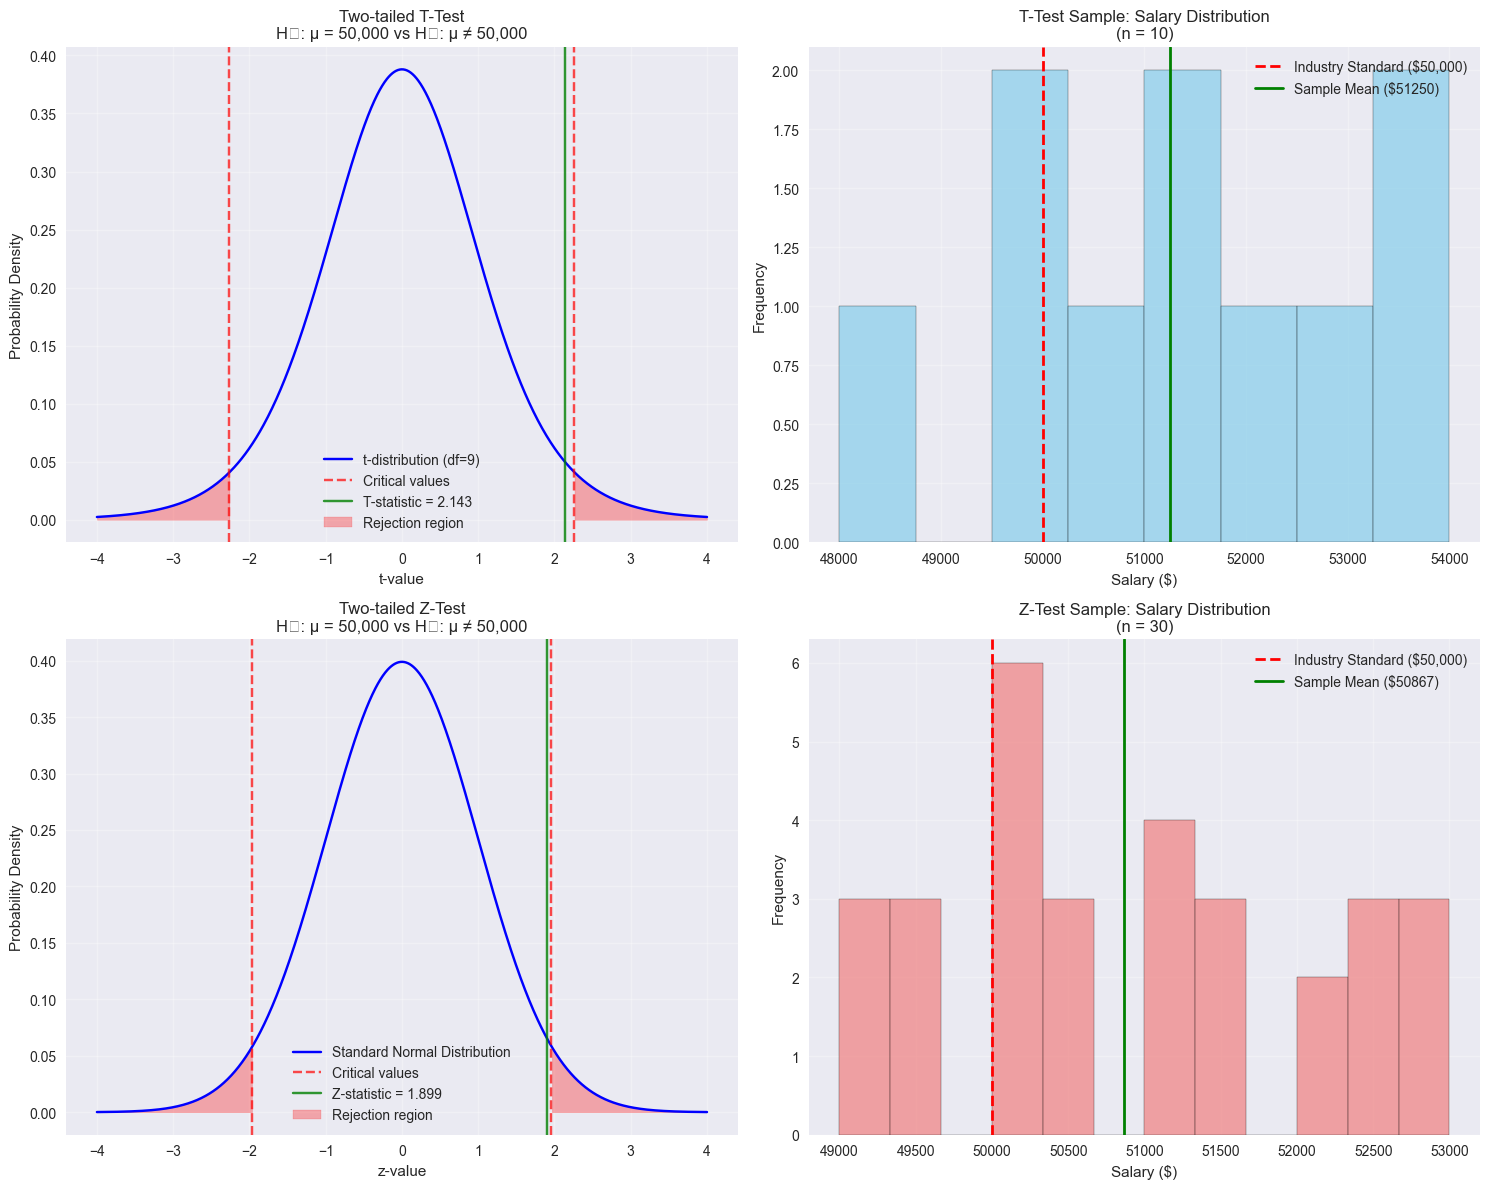


SUMMARY OF HYPOTHESIS TESTS
    Test Type Sample Mean Two-tailed p-value Two-tailed Result One-tailed p-value One-tailed Result
T-Test (n=10)   $51250.00             0.0607 Fail to reject H₀             0.9696 Fail to reject H₀
Z-Test (n=30)   $50866.67             0.0576 Fail to reject H₀             0.0288         Reject H₀


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


def complete_analysis():

    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    
    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, degrees_freedom)
    
    axes[0, 0].plot(x, y, 'b-', label=f"t-distribution (df={degrees_freedom})")
    t_critical = stats.t.ppf(0.975, degrees_freedom)
    axes[0, 0].axvline(x=-t_critical, color='r', linestyle='--', alpha=0.7, label='Critical values')
    axes[0, 0].axvline(x=t_critical, color='r', linestyle='--', alpha=0.7)
    axes[0, 0].axvline(x=t_stat_two, color='g', linestyle='-', alpha=0.8, label=f'T-statistic = {t_stat_two:.3f}')
    axes[0, 0].fill_between(x, y, where=(x <= -t_critical), color='red', alpha=0.3, label='Rejection region')
    axes[0, 0].fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.3)
    axes[0, 0].set_title('Two-tailed T-Test\nH₀: μ = 50,000 vs H₁: μ ≠ 50,000')
    axes[0, 0].set_xlabel('t-value')
    axes[0, 0].set_ylabel('Probability Density')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
   
    x_z = np.linspace(-4, 4, 1000)
    y_z = stats.norm.pdf(x_z)
    
    axes[1, 0].plot(x_z, y_z, 'b-', label="Standard Normal Distribution")
    z_critical = stats.norm.ppf(0.975)
    axes[1, 0].axvline(x=-z_critical, color='r', linestyle='--', alpha=0.7, label='Critical values')
    axes[1, 0].axvline(x=z_critical, color='r', linestyle='--', alpha=0.7)
    axes[1, 0].axvline(x=z_stat_two, color='g', linestyle='-', alpha=0.8, label=f'Z-statistic = {z_stat_two:.3f}')
    axes[1, 0].fill_between(x_z, y_z, where=(x_z <= -z_critical), color='red', alpha=0.3, label='Rejection region')
    axes[1, 0].fill_between(x_z, y_z, where=(x_z >= z_critical), color='red', alpha=0.3)
    axes[1, 0].set_title('Two-tailed Z-Test\nH₀: μ = 50,000 vs H₁: μ ≠ 50,000')
    axes[1, 0].set_xlabel('z-value')
    axes[1, 0].set_ylabel('Probability Density')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
  
    axes[0, 1].hist(t_test_data['Salary'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(x=50000, color='red', linestyle='--', linewidth=2, label='Industry Standard ($50,000)')
    axes[0, 1].axvline(x=t_test_data['Salary'].mean(), color='green', linestyle='-', linewidth=2, label=f'Sample Mean (${t_test_data["Salary"].mean():.0f})')
    axes[0, 1].set_title('T-Test Sample: Salary Distribution\n(n = 10)')
    axes[0, 1].set_xlabel('Salary ($)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 1].hist(z_test_data['Salary'], bins=12, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 1].axvline(x=50000, color='red', linestyle='--', linewidth=2, label='Industry Standard ($50,000)')
    axes[1, 1].axvline(x=z_test_data['Salary'].mean(), color='green', linestyle='-', linewidth=2, label=f'Sample Mean (${z_test_data["Salary"].mean():.0f})')
    axes[1, 1].set_title('Z-Test Sample: Salary Distribution\n(n = 30)')
    axes[1, 1].set_xlabel('Salary ($)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


complete_analysis()


summary_data = {
    'Test Type': ['T-Test (n=10)', 'Z-Test (n=30)'],
    'Sample Mean': [f"${t_test_data['Salary'].mean():.2f}", f"${z_test_data['Salary'].mean():.2f}"],
    'Two-tailed p-value': [f"{p_value_two:.4f}", f"{p_value_z_two:.4f}"],
    'Two-tailed Result': ['Reject H₀' if p_value_two < 0.05 else 'Fail to reject H₀', 
                         'Reject H₀' if p_value_z_two < 0.05 else 'Fail to reject H₀'],
    'One-tailed p-value': [f"{p_value_one:.4f}", f"{p_value_z_one:.4f}"],
    'One-tailed Result': ['Reject H₀' if p_value_one < 0.05 else 'Fail to reject H₀', 
                         'Reject H₀' if p_value_z_one < 0.05 else 'Fail to reject H₀']
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("SUMMARY OF HYPOTHESIS TESTS")
print("="*80)
print(summary_df.to_string(index=False))